### DATA DESCRIPTION: 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls
### ATTRIBUTE INFORMATION: 

1. age : Age (years) 
2. workclass : Workclass 8 different categories: (Private, Self-emp-not-inc,   Self-emp-inc, Federal-gov, Localgov, State-gov, Without-pay, Never-worked) 

3. fnlwgt:  Final Weight* 

4. Education: (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool) 

5. education-num : Years of education 
6. marital-status : Marital Status: (Married-civ-spouse,   Divorced, Never-married, Separated, Widowed, Marriedspouse-absent,   Married-AF-spouse) 
7. occupation : Occupation: (Tech-support, Craft-repair,   Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,   Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Privhouse-serv,   Protective-serv, Armed-Forces) 

8. relationship: Relationship:(Wife, Own-child, Husband,   Not-in-family, Other-relative, Unmarried) 

9. race: Race: (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black) 

10. sex: Sex: (Male, Female) 

11. capital-gain: Amount of capital gained 

12. capital-loss: Amount of capital lost 

13. hours-perweek: Number of hours worked per week 

14. native-country : Native country: (United-States, Cambodia, England, Puerto-Rico, Canada, Germany,   OutlyingUS(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,   Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,   France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,   Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,   Trinadad&Tobago, Peru, Hong, Holand-Netherlands) 

15. income : Either the income is greater than $ 50,000 or lesser than and equal to $ 50,000: (>50K, <=50K) 

## PROBLEM STATEMENT
### The objective is to develop a predictive model that accurately classifies individuals' income as either above $50,000 or $50,000 or lower based on demographic and socio-economic features obtained from direct marketing campaigns of a Portuguese banking institution.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,323773,11th,7,Married-civ-spouse,Priv-house-serv,Other-relative,White,Female,0,0,40,United-States,<=50K
1,48,Private,175070,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,2258,40,United-States,>50K
2,48,Self-emp-not-inc,51620,Bachelors,13,Separated,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
3,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
4,44,Self-emp-inc,168845,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,60,United-States,<=50K


In [4]:
print('rows:',df.shape[0])
print('columns:',df.shape[1])
df.info()

rows: 2000
columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2000 non-null   int64 
 1   workclass       2000 non-null   object
 2   fnlwgt          2000 non-null   int64 
 3   education       2000 non-null   object
 4   education.num   2000 non-null   int64 
 5   marital.status  2000 non-null   object
 6   occupation      2000 non-null   object
 7   relationship    2000 non-null   object
 8   race            2000 non-null   object
 9   sex             2000 non-null   object
 10  capital.gain    2000 non-null   int64 
 11  capital.loss    2000 non-null   int64 
 12  hours.per.week  2000 non-null   int64 
 13  native.country  2000 non-null   object
 14  income          2000 non-null   object
dtypes: int64(6), object(9)
memory usage: 234.5+ KB


#### *`Inference:`*

The numerical i,e.. continuous and discrete columns are age,fnlwgt,education.num.capital.gain,capital.loss, hours.prer.week

The categorical columns are workclass education martial.status,occupation,relationship,race,sex,native.country,income

In [5]:
cat=df.select_dtypes(exclude=np.number)
print('total number of categorical columns:',cat.shape[1])
print('total number of categorical rows:',cat.shape[0])
cat.head()

total number of categorical columns: 9
total number of categorical rows: 2000


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,11th,Married-civ-spouse,Priv-house-serv,Other-relative,White,Female,United-States,<=50K
1,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States,>50K
2,Self-emp-not-inc,Bachelors,Separated,Craft-repair,Not-in-family,White,Male,United-States,<=50K
3,Self-emp-not-inc,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
4,Self-emp-inc,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,United-States,<=50K


In [6]:
num=df.select_dtypes(include=np.number)
print('total number of numerical columns:',num.shape[1])
print('total number of numerical rows:',num.shape[0])
num.head()


total number of numerical columns: 6
total number of numerical rows: 2000


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,49,323773,7,0,0,40
1,48,175070,9,0,2258,40
2,48,51620,13,0,0,50
3,90,155981,13,10566,0,50
4,44,168845,9,0,0,60


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.676500,187979.847500,10.065500,1261.799000,83.034500,40.316000
std,13.713055,104959.530657,2.578475,8398.998049,388.689399,12.239732
min,17.000000,19214.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,114627.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,174642.500000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,235881.750000,12.000000,0.000000,0.000000,45.000000
max,90.000000,750972.000000,16.000000,99999.000000,2603.000000,99.000000


#### *`Inference:`*

`count` gives us the total count of rows in each numerical columns

`mean` give us the  average of numerical columns

`std` give us the standard deviation  of numerical columns

`min` gives us the minimum value of numerical columns

`25%` explains the quartile range of 25% and summarises the 25% of the values in the columns 

`50%` explains the quartile range of 50% i,e MEDIAN and summarises the 50% of the values in the columns

`75%` explains the quartile range of 75% and summarises the 75% of the values in the columns

`max%` gives us the maximum value of numerical columns

In [8]:
print('total number of categorical columns:',cat.shape[1])
print('total number of categorical rows:',cat.shape[0])
for i in cat:
    print(round(cat[i].value_counts(normalize=True)*100,2))
    print('################################################')

total number of categorical columns: 9
total number of categorical rows: 2000
Private             69.45
Local-gov            7.50
Self-emp-not-inc     7.05
?                    5.90
State-gov            3.95
Self-emp-inc         3.60
Federal-gov          2.50
Never-worked         0.05
Name: workclass, dtype: float64
################################################
HS-grad         31.15
Some-college    23.20
Bachelors       17.60
Masters          4.80
Assoc-voc        4.30
11th             3.75
Assoc-acdm       3.65
10th             3.05
7th-8th          2.10
Prof-school      1.30
9th              1.30
5th-6th          1.15
Doctorate        1.10
12th             0.70
1st-4th          0.65
Preschool        0.20
Name: education, dtype: float64
################################################
Married-civ-spouse       45.30
Never-married            33.35
Divorced                 13.40
Separated                 3.30
Widowed                   3.10
Married-spouse-absent     1.45
Married-AF-spo

In [9]:
for i in cat:
    print(round(cat[i].value_counts(normalize=True)*100,2))
    print('################################################')

Private             69.45
Local-gov            7.50
Self-emp-not-inc     7.05
?                    5.90
State-gov            3.95
Self-emp-inc         3.60
Federal-gov          2.50
Never-worked         0.05
Name: workclass, dtype: float64
################################################
HS-grad         31.15
Some-college    23.20
Bachelors       17.60
Masters          4.80
Assoc-voc        4.30
11th             3.75
Assoc-acdm       3.65
10th             3.05
7th-8th          2.10
Prof-school      1.30
9th              1.30
5th-6th          1.15
Doctorate        1.10
12th             0.70
1st-4th          0.65
Preschool        0.20
Name: education, dtype: float64
################################################
Married-civ-spouse       45.30
Never-married            33.35
Divorced                 13.40
Separated                 3.30
Widowed                   3.10
Married-spouse-absent     1.45
Married-AF-spouse         0.10
Name: marital.status, dtype: float64
########################

#### *`Inference:`*

there is ?  found in native.country,occupation,workclass

In [10]:
#treating the anomalies like [?] by adding some other categories in subcalss as per basic domain knowledge
df['native.country']=df['native.country'].replace('?','Argentina')
df['native.country'].unique()
# converted as the Argentina beacuse there are different  countries 
# so we have added something unique as Argentina

array(['United-States', 'Puerto-Rico', 'Mexico', 'Peru', 'Philippines',
       'Argentina', 'El-Salvador', 'Italy', 'Dominican-Republic',
       'Nicaragua', 'South', 'Yugoslavia', 'Cuba', 'India', 'Taiwan',
       'Germany', 'Jamaica', 'France', 'Thailand', 'Poland', 'Portugal',
       'Outlying-US(Guam-USVI-etc)', 'Japan', 'Cambodia', 'Ireland',
       'Vietnam', 'China', 'Hungary', 'England', 'Laos', 'Iran', 'Haiti',
       'Guatemala', 'Canada', 'Greece', 'Hong'], dtype=object)

In [11]:
df['occupation']=df['occupation'].replace('?','Medical-service')
df['occupation'].unique()
# converted as the Medical-service beacuse there are different types of occupation included
# so we have added something unique as medical service

array(['Priv-house-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Sales', 'Transport-moving', 'Machine-op-inspct',
       'Farming-fishing', 'Adm-clerical', 'Other-service',
       'Handlers-cleaners', 'Medical-service', 'Protective-serv',
       'Tech-support'], dtype=object)

In [12]:
df['workclass']=df['workclass'].replace('?','Private')
df['workclass'].unique()
# converted as the private beacuse they are the mode of this column workclass


array(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov',
       'Federal-gov', 'State-gov', 'Never-worked'], dtype=object)

In [13]:
pd.set_option('display.max_rows',None)
for i in num:
    print(round(num[i].value_counts(normalize=True)*100,2))
    print('################################################')

25    3.30
28    2.95
23    2.90
35    2.75
34    2.75
32    2.75
33    2.70
36    2.65
27    2.65
44    2.65
24    2.60
39    2.60
38    2.50
31    2.45
45    2.40
42    2.30
43    2.30
19    2.30
37    2.25
41    2.25
51    2.25
29    2.25
40    2.20
26    2.15
22    2.15
46    2.10
20    2.10
30    2.10
49    2.05
47    2.00
21    1.95
52    1.80
50    1.75
55    1.75
18    1.70
58    1.60
53    1.55
48    1.45
17    1.30
57    1.20
54    1.20
59    1.00
64    1.00
61    0.95
56    0.75
60    0.70
62    0.65
63    0.60
67    0.60
65    0.55
69    0.55
66    0.25
78    0.20
90    0.20
68    0.20
72    0.15
74    0.15
75    0.10
76    0.10
77    0.10
79    0.10
80    0.10
71    0.10
70    0.05
73    0.05
81    0.05
82    0.05
83    0.05
84    0.05
Name: age, dtype: float64
################################################
108140    0.20
148995    0.15
154641    0.15
126569    0.10
217961    0.10
159442    0.10
100669    0.10
142675    0.10
122850    0.10
190290    0.10
289405    0.10
9

In [14]:
#thre are no anomalies in the numerical coulmn just for verifying we did pd.set_option
# which will display us all the maximum rows

In [16]:
df.isnull().sum()/len(df)*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

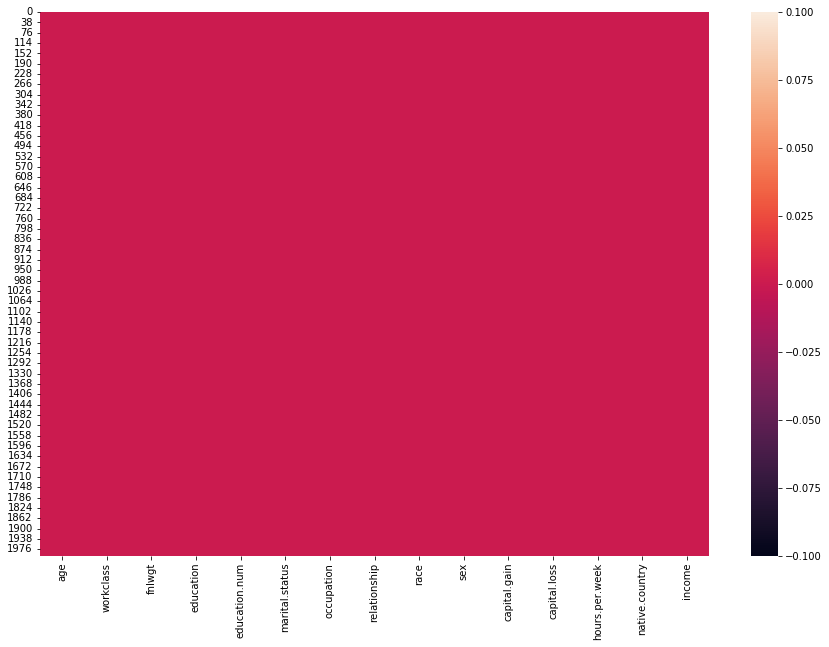

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

#### *`Inference:`*

there is no null values found

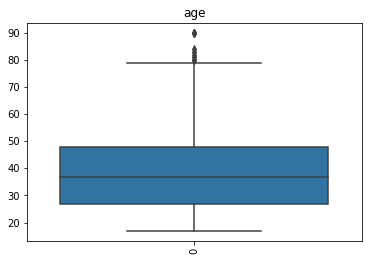

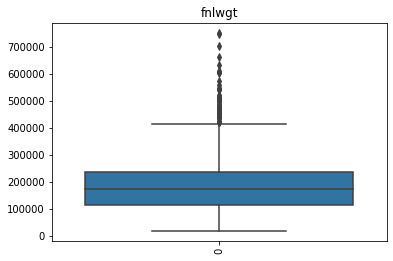

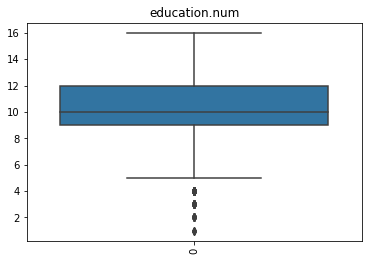

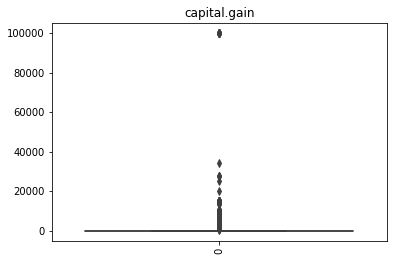

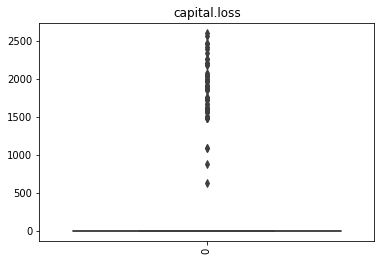

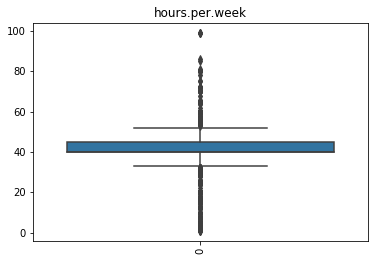

In [18]:
for i in num:
    sns.boxplot(num[i])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

#### *`Inference:`*

yes there are outliers in all the numerical columns

there have both positive and the negative ourliers

In [19]:
for i in num:
    print(i,num[i].skew())

age 0.555001611483052
fnlwgt 1.0900139285553776
education.num -0.43053127789935225
capital.gain 10.733476386092127
capital.loss 4.595649056526017
hours.per.week -0.012264158820606306


In [20]:
q3=df.quantile(0.75)
q1=df.quantile(0.25)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
outliers=df[((df>ul)| (df<ll)).any(axis=1)]
print('total number of outliers:',len(outliers))

total number of outliers: 860


#### *`Inference:`*

we dont want to drop the outliers as it will we the loss of data instead we can do a tranform useing the Powertransformer before building the model 



In [21]:
#we are going by the data and predictiong wether the income is greater than or equal
#OR it is lesser than or equal to 50K
df['income'].value_counts(normalize=True)*100

<=50K    76.6
>50K     23.4
Name: income, dtype: float64

#### *`Inference:`*

We have only 70% and 20% the target variable is imbalanced

for this we can do SMOTE,OVERSAMPLING or UNDERSAMPLING to make the target variable balanced

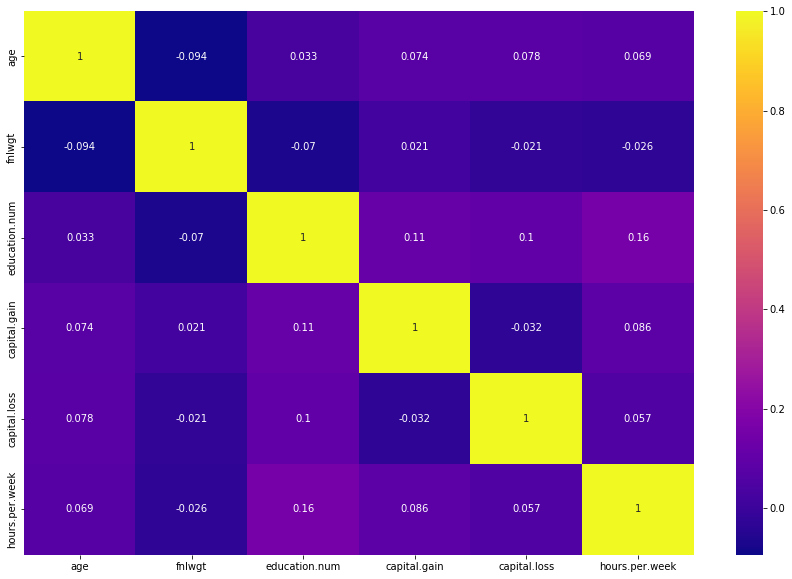

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

####  *`Inference:`*

Target Variable is not a numerical one and there is no presence of high relation between the independent variables which is good

Every variable is highly correlated with itself



In [23]:
df.std()

age                   13.713055
fnlwgt            104959.530657
education.num          2.578475
capital.gain        8398.998049
capital.loss         388.689399
hours.per.week        12.239732
dtype: float64

####  *`Inference:`*

From the above analysis we are not going to drop any variables as it will be the loss of data

we are going to build a logit model and based on the summary we will be dropping the columns based on the p_value if it is greatr than 0.5



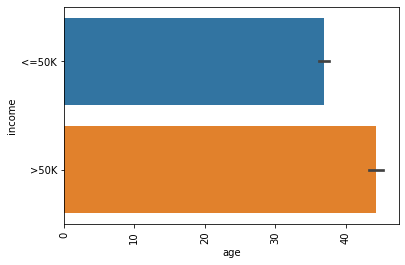

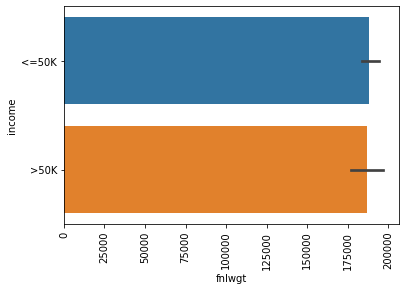

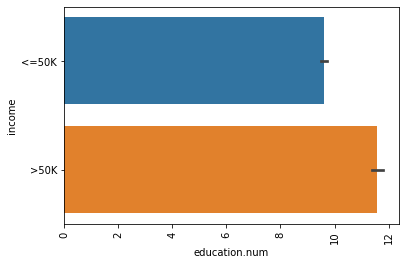

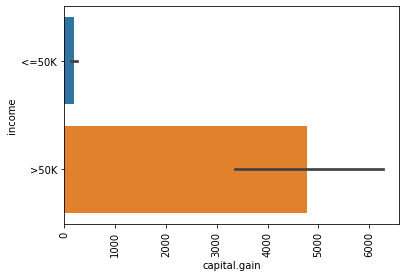

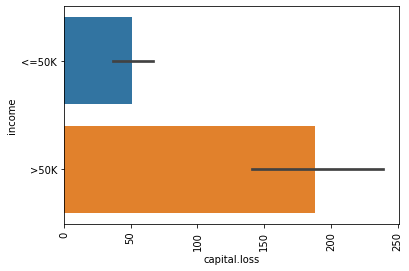

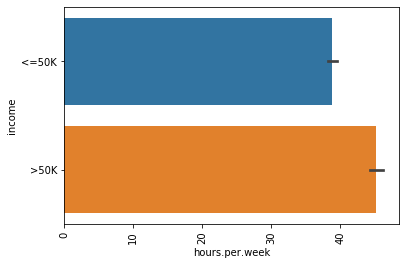

In [24]:
#[cat[Target Variable] VS num]
for i in num:
    sns.barplot(x=num[i],y=df['income'],data=num)
    plt.xticks(rotation=90)
    plt.show()

####  *`Inference:`*

From the above analysis  all the variables are associated with the target variable

The people above age 40 is earning a more than 50K 

The most educated people is earning higher salary

The people who is working more hours per week is earning high



In [25]:
cat.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

Text(0.5, 1.0, 'income-workclass')

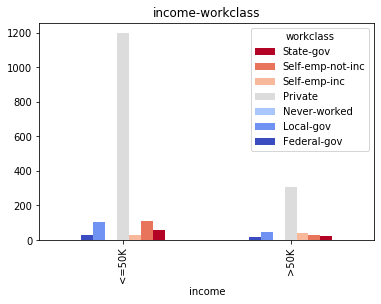

In [26]:
#[cat[Target Variable] VS cat]
pd.crosstab(df['income'],df['workclass']).plot(kind='bar',cmap='coolwarm',legend='reverse')
plt.title('income-workclass')

####  *`Inference:`*

From the above analysis   the variable is associated with the target variable

The private workclass are in higher numbers based on both classes of income

The Federal-gov workclass are in lower numbers based on both classes of income


Text(0.5, 1.0, 'income-education')

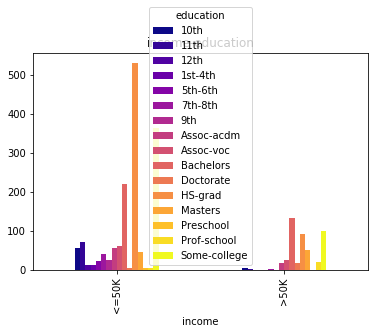

In [27]:
pd.crosstab(df['income'],df['education']).plot(kind='bar',cmap='plasma')
plt.title('income-education')

####  *`Inference:`*


From the above analysis  the variable is associated with the target variable

The indviduals done hs-grade are  in higher numbers compared to all other education in income below 50k

The indviduals who have done doctrate is earning higher income >50k than all other done other educatioon


Text(0.5, 1.0, 'income-martial.status')

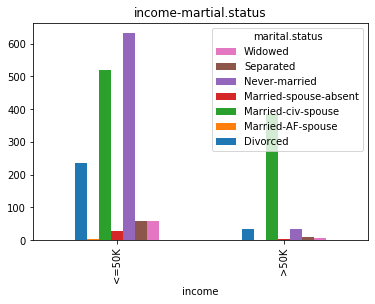

In [28]:
pd.crosstab(df['income'],df['marital.status']).plot(kind='bar',legend='reverse')
plt.title('income-martial.status')

####  *`Inference:`*


From the above analysis  the variable is associated with the target variable

The indviduals are never maried is earning income below 50k than all other martial status

The indviduals are maried-civ spouse is earning income above 50k than all other martial status


Text(0.5, 1.0, 'income-occupation')

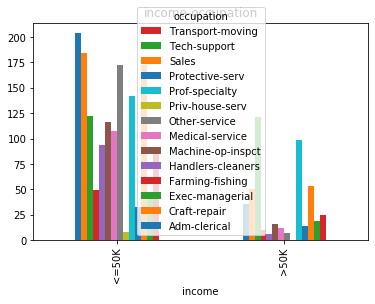

In [29]:
pd.crosstab(df['income'],df['occupation']).plot(kind='bar',legend='reverse')
plt.title('income-occupation')

####  *`Inference:`*


From the above analysis  the variable is associated with the target variable

The indviduals working as exec-managerial is in more numbers earning income above  50k than other occupations

The indviduals working as admin-clerical is in more numbers earning income below  50k than other occupations


Text(0.5, 1.0, 'income-relationship')

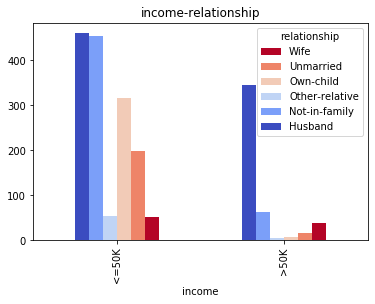

In [30]:
pd.crosstab(df['income'],df['relationship']).plot(kind='bar',cmap='coolwarm',legend='reverse')
plt.title('income-relationship')

####  *`Inference:`*


From the above analysis  the variable is associated with the target variable

Husband is earning more in both the income classe above and below 50k of income

the those who are not in family is followed as the next higher in numbers next to husband in classes above and below 50k of income


Text(0.5, 1.0, 'income-race')

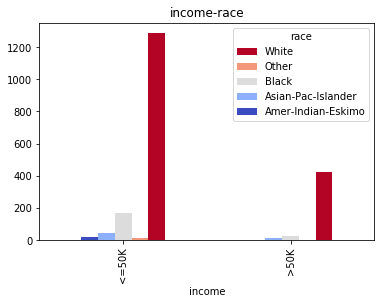

In [31]:
pd.crosstab(df['income'],df['race']).plot(kind='bar',cmap='coolwarm',legend='reverse')
plt.title('income-race')

####  *`Inference:`*


From the above analysis  the variable is associated with the target variable

white race is earning more in both the income classe above and below 50k

then the black  in race is followed as the next higher in numbers next to white in race in classes above and below 50k of income


Text(0.5, 1.0, 'income-sex')

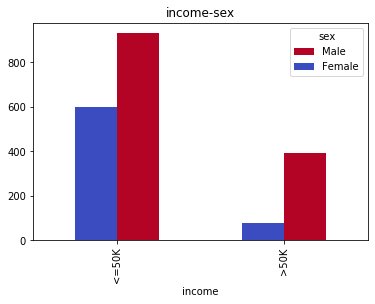

In [32]:
pd.crosstab(df['income'],df['sex']).plot(kind='bar',cmap='coolwarm',legend='reverse')
plt.title('income-sex')

####  *`Inference:`*


From the above analysis  the variable is associated with the target variable

male is earning more income in the both classes earning above and below 50k 

female is also earning more income in the both classes but lesser comapared to the number of males earning above and below 50k 


Text(0.5, 1.0, 'income-native.country')

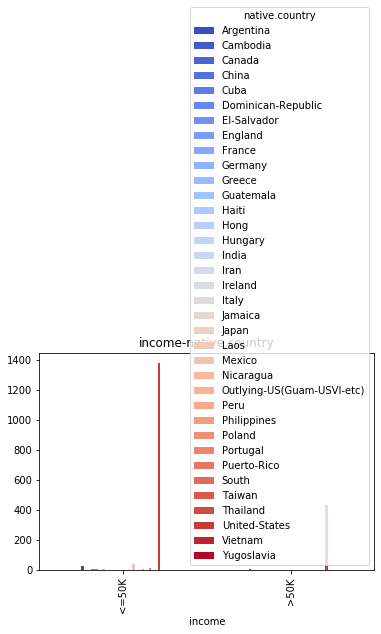

In [33]:
pd.crosstab(df['income'],df['native.country']).plot(kind='bar',cmap='coolwarm')
plt.title('income-native.country')

#### *`Inference:`*
From the above analysis  the variable is associated with the target variable

the people in united states is highest in numbers in income classes above and below 50K

female is also earning more income in the both classes but lesser comapared to the number of males earning above and below 50k 

In [34]:
cols=num.columns
pp=PowerTransformer(method='yeo-johnson',standardize=True)
num=pp.fit_transform(num)

num=pd.DataFrame(num,columns=cols)
num.head()
#we have done the transformation to the numerical columns as there a large range of outliers
#so instead of dropping the outliers we have done transformation so the outliers will be 
#reduced comapared previously

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,0.822355,1.248263,-1.199309,-0.319262,-0.217072,-0.042761
1,0.762006,0.043157,-0.473894,-0.319262,4.606758,-0.042761
2,0.762006,-1.613845,1.183832,-0.319262,-0.217072,0.790184
3,2.707510,-0.151233,1.183832,3.132361,-0.217072,0.790184
4,0.509864,-0.018793,-0.473894,-0.319262,-0.217072,1.640264


In [35]:
for i in num:
    print(i,num[i].skew())
#therefore we can see that the skewness is reduced

age -0.015363382705827046
fnlwgt -0.005101134176523425
education.num 0.011618471403442238
capital.gain 2.8150711641810306
capital.loss 4.392981361438782
hours.per.week 0.20488857116058418


In [36]:
#encodeing categotical to numerical
le=LabelEncoder()
for i in cat:
    cat[i]=le.fit_transform(cat[i])
df1=pd.concat([num,cat],axis=1)

In [37]:
x=df1.drop('income',axis=1)
y=df1['income']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=100)

In [38]:
print('no. of independent variables in training:',xtrain.shape)
print('no. of target variables in training:',ytrain.shape)
print('no. of independent variables in testing:',xtest.shape[0])
print('no. of target variables in testing:',ytest.shape[0])

no. of independent variables in training: (1400, 14)
no. of target variables in training: (1400,)
no. of independent variables in testing: 600
no. of target variables in testing: 600


In [39]:
from scipy import stats

In [40]:
#h0:mu1==mu2
#h1:mu1!=mu2
stats.ttest_ind(ytrain,ytest)
#we assume confidence interval as 95% the P_value is greater than the sig_value
# and conclude that all means are same and hence statistically proved

Ttest_indResult(statistic=-0.8756543229903835, pvalue=0.3813232397678322)

##### BASE MODEL:

we choose the Logistic regression as the base model as it it derived from the LinerRegression line which is being converted into sigmoid curve based on log values

In [41]:
lr=LogisticRegression()
bm=lr.fit(xtrain,ytrain)
ypred_bm=bm.predict(xtest)
ypred_bm1=bm.predict(xtrain)
#a.	What is the overall Accuracy? Please comment on whether it is good or not. 
print('accuracy score of Logistic Regression on testing data',accuracy_score(ytest,ypred_bm))
print('accuracy score of Logistic Regression on training data',accuracy_score(ytrain,ypred_bm1))
#the base model is performing good both in training data and the testing data
#it is a goodfit model as theyare only a slight difference bitween the training data
#and the testing data

accuracy score of Logistic Regression on testing data 0.79
accuracy score of Logistic Regression on training data 0.8271428571428572


In [42]:
print('prescision score of Logistic Regression on testing data',precision_score(ytest,ypred_bm))
print('precision_score of Logistic Regression on training data',precision_score(ytrain,ypred_bm1))
print('recall_score of Logistic Regression on testing data',recall_score(ytest,ypred_bm))
print('recall_score of Logistic Regression on training data',recall_score(ytrain,ypred_bm1))
print('f1_score of Logistic Regression on testing data',f1_score(ytest,ypred_bm))
print('f1_score of Logistic Regression on training data',f1_score(ytrain,ypred_bm1))

prescision score of Logistic Regression on testing data 0.627906976744186
precision_score of Logistic Regression on training data 0.6875
recall_score of Logistic Regression on testing data 0.36486486486486486
recall_score of Logistic Regression on training data 0.446875
f1_score of Logistic Regression on testing data 0.4615384615384615
f1_score of Logistic Regression on training data 0.5416666666666667


In [43]:
x=df1.drop('income',axis=1)
y=df1['income']
x_c=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=0.30,random_state=100)
model1=sm.Logit(ytrain,xtrain).fit()
model1.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.373127
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1385
Method:                           MLE   Df Model:                           14
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.3059
Time:                        07:48:18   Log-Likelihood:                -522.38
converged:                       True   LL-Null:                       -752.56
Covariance Type:            nonrobust   LLR p-value:                 2.284e-89
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4720      0.723     -4.805      0.000      -4.888      -2.056
age                0.6057      0.100      6.062      0.000       0.410       0.802
fnlwgt             0.1796      0.080      2.258      0.024       0.024       0.336
education.num      0.8419      0.088      9.573      0.000       0.670       1.014
capital.gain       0.5511      0.069      8.000      0.000       0.416       0.686
capital.loss       0.2641      0.065      4.041      0.000       0.136       0.392
hours.per.week     0.3542      0.085      4.158      0.000       0.187       0.521
workclass         -0.0117      0.053     -0.220      0.826      -0.116       0.093
education          0.0556      0.026      2.103      0.035       0.004       0.107
marital.status    -0.2159      0.059     -3.659      0.000      -0.332      -0.100
occupation        -0.0018      0.020     -0.092      0.927      -0.040       0.036
relationship      -0.1174      0.071     -1.651      0.099      -0.257       0.022
race               0.1901      0.111      1.718      0.086      -0.027       0.407
sex                0.8761      0.240      3.649      0.000       0.406       1.347
native.country     0.0179      0.013      1.361      0.173      -0.008       0.044
==================================================================================
"""

In [44]:
# we are going to drop the variables for which the p-value which are greater than 0.5
#as they are insignificant with the target variable
x=df1.drop(['income','occupation'],axis=1)
y=df1['income']
x_c=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=0.30,random_state=100)
model1=sm.Logit(ytrain,xtrain).fit()
model1.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.373130
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1386
Method:                           MLE   Df Model:                           13
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.3059
Time:                        07:48:18   Log-Likelihood:                -522.38
converged:                       True   LL-Null:                       -752.56
Covariance Type:            nonrobust   LLR p-value:                 3.772e-90
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4791      0.718     -4.843      0.000      -4.887      -2.071
age                0.6058      0.100      6.063      0.000       0.410       0.802
fnlwgt             0.1794      0.080      2.256      0.024       0.024       0.335
education.num      0.8413      0.088      9.595      0.000       0.669       1.013
capital.gain       0.5512      0.069      8.002      0.000       0.416       0.686
capital.loss       0.2643      0.065      4.045      0.000       0.136       0.392
hours.per.week     0.3536      0.085      4.166      0.000       0.187       0.520
workclass         -0.0123      0.053     -0.233      0.816      -0.116       0.092
education          0.0556      0.026      2.103      0.035       0.004       0.107
marital.status    -0.2162      0.059     -3.668      0.000      -0.332      -0.101
relationship      -0.1173      0.071     -1.649      0.099      -0.257       0.022
race               0.1898      0.111      1.716      0.086      -0.027       0.407
sex                0.8762      0.240      3.649      0.000       0.406       1.347
native.country     0.0179      0.013      1.363      0.173      -0.008       0.044
==================================================================================
"""

In [45]:
# we are going to drop the variables for which the p-value which are greater than 0.5
#as they are insignificant with the target variable
x=df1.drop(['income','occupation','workclass'],axis=1)
y=df1['income']
x_c=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=0.30,random_state=100)
model1=sm.Logit(ytrain,xtrain).fit()
model1.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.373149
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1387
Method:                           MLE   Df Model:                           12
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.3058
Time:                        07:48:18   Log-Likelihood:                -522.41
converged:                       True   LL-Null:                       -752.56
Covariance Type:            nonrobust   LLR p-value:                 6.112e-91
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.5215      0.695     -5.068      0.000      -4.883      -2.160
age                0.6072      0.100      6.083      0.000       0.412       0.803
fnlwgt             0.1796      0.080      2.258      0.024       0.024       0.335
education.num      0.8401      0.088      9.601      0.000       0.669       1.012
capital.gain       0.5509      0.069      8.000      0.000       0.416       0.686
capital.loss       0.2651      0.065      4.064      0.000       0.137       0.393
hours.per.week     0.3512      0.084      4.169      0.000       0.186       0.516
education          0.0553      0.026      2.096      0.036       0.004       0.107
marital.status    -0.2159      0.059     -3.665      0.000      -0.331      -0.100
relationship      -0.1162      0.071     -1.638      0.101      -0.255       0.023
race               0.1887      0.110      1.709      0.087      -0.028       0.405
sex                0.8766      0.240      3.650      0.000       0.406       1.347
native.country     0.0180      0.013      1.364      0.173      -0.008       0.044
==================================================================================
"""

In [46]:
xtrain.columns

Index(['const', 'age', 'fnlwgt', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week', 'education', 'marital.status',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [47]:
#these variables are significant with the target variable
#'age', 'fnlwgt', 'education.num', 'capital.gain','capital.loss', 'hours.per.week', 'education',
#'marital.status','relationship', 'race', 'sex', 'native.country'

In [48]:
print('Cohen’s Kappa Value  of Logistic Regression on testing data',cohen_kappa_score(ytest,ypred_bm))
print('Cohen’s Kappa Value  of Logistic Regression on training data',cohen_kappa_score(ytrain,ypred_bm1))

Cohen’s Kappa Value  of Logistic Regression on testing data 0.34228841870824045
Cohen’s Kappa Value  of Logistic Regression on training data 0.4409978880675818


#### *`INFERENCE:`*
On the analysis of the overall score of both traing and the testing we can infer that the model is performing good but the model is POOR FIT as our target variable is imabalnced we go for the F1 score


 we will be looking for the RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, DecisionTreeClassifier, XGBClassifier,GaussianNB,BernoulliNB
,KNeighborsClassifier

In [49]:
kn=KNeighborsClassifier()
m2=kn.fit(xtrain,ytrain)
ypred_m2=m2.predict(xtest)
print('accuracy score of KNeighborsClassifier on testing data',accuracy_score(ytest,ypred_m2))
print('prescision score of KNeighborsClassifier on testing data',precision_score(ytest,ypred_m2))
print('recall_score of KNeighborsClassifier on testing data',recall_score(ytest,ypred_m2))
print('f1_score of KNeighborsClassifier on testing data',f1_score(ytest,ypred_m2))
# the models perfomance is slightly decreased on comapreing the models perfomance in the basemodel

accuracy score of KNeighborsClassifier on testing data 0.7766666666666666
prescision score of KNeighborsClassifier on testing data 0.5546875
recall_score of KNeighborsClassifier on testing data 0.4797297297297297
f1_score of KNeighborsClassifier on testing data 0.5144927536231882


In [50]:
bn=BernoulliNB()
m3=bn.fit(xtrain,ytrain)
ypred_m3=m3.predict(xtest)
print('accuracy score of BernoulliNB on testing data',accuracy_score(ytest,ypred_m3))
print('prescision score of BernoulliNB on testing data',precision_score(ytest,ypred_m3))
print('recall_score of BernoulliNBr on testing data',recall_score(ytest,ypred_m3))
print('f1_score of BernoulliNB on testing data',f1_score(ytest,ypred_m3))
# the models perfomance is slightly increased on comapreing the models perfomance in the KNeighborsClassifier

accuracy score of BernoulliNB on testing data 0.795
prescision score of BernoulliNB on testing data 0.5925925925925926
recall_score of BernoulliNBr on testing data 0.5405405405405406
f1_score of BernoulliNB on testing data 0.5653710247349824


In [51]:
Gb=GaussianNB()
m4=Gb.fit(xtrain,ytrain)
ypred_m4=m4.predict(xtest)
print('accuracy score of GaussianNB on testing data',accuracy_score(ytest,ypred_m4))
print('prescision score of GaussianNB on testing data',precision_score(ytest,ypred_m4))
print('recall_score of GaussianNB on testing data',recall_score(ytest,ypred_m4))
print('f1_score of GaussianNB on testing data',f1_score(ytest,ypred_m4))
# the models perfomance is slightly decresed on comapreing the models perfomance in the BernoulliNB

accuracy score of GaussianNB on testing data 0.7583333333333333
prescision score of GaussianNB on testing data 0.5106382978723404
recall_score of GaussianNB on testing data 0.4864864864864865
f1_score of GaussianNB on testing data 0.4982698961937716


In [52]:
dt=DecisionTreeClassifier()
m5=dt.fit(xtrain,ytrain)
ypred_m5=m5.predict(xtest)
print('accuracy score of DecisionTreeClassifier on testing data',accuracy_score(ytest,ypred_m5))
print('prescision score of DecisionTreeClassifier on testing data',precision_score(ytest,ypred_m5))
print('recall_score of DecisionTreeClassifier on testing data',recall_score(ytest,ypred_m5))
print('f1_score of DecisionTreeClassifier on testing data',f1_score(ytest,ypred_m5))
# the models perfomance is slightly Decreased on comapreing the models perfomance in the GaussianNB

accuracy score of DecisionTreeClassifier on testing data 0.7566666666666667
prescision score of DecisionTreeClassifier on testing data 0.5070422535211268
recall_score of DecisionTreeClassifier on testing data 0.4864864864864865
f1_score of DecisionTreeClassifier on testing data 0.496551724137931


In [53]:
rf=RandomForestClassifier()
m6=rf.fit(xtrain,ytrain)
ypred_m6=m6.predict(xtest)
print('accuracy score of RandomForestClassifier on testing data',accuracy_score(ytest,ypred_m6))
print('prescision score of RandomForestClassifier on testing data',precision_score(ytest,ypred_m6))
print('recall_score of RandomForestClassifier on testing data',recall_score(ytest,ypred_m6))
print('f1_score of RandomForestClassifier on testing data',f1_score(ytest,ypred_m6))
# the models perfomance is slightly increased on comapreing the models perfomance in the DecisionTreeClassifier

accuracy score of RandomForestClassifier on testing data 0.8216666666666667
prescision score of RandomForestClassifier on testing data 0.7029702970297029
recall_score of RandomForestClassifier on testing data 0.4797297297297297
f1_score of RandomForestClassifier on testing data 0.5702811244979921


In [54]:
gbc=GradientBoostingClassifier()
m7=gbc.fit(xtrain,ytrain)
ypred_m7=m7.predict(xtest)
print('accuracy score of GradientBoostingClassifier on testing data',accuracy_score(ytest,ypred_m7))
print('prescision score of GradientBoostingClassifier on testing data',precision_score(ytest,ypred_m7))
print('recall_score of GradientBoostingClassifier on testing data',recall_score(ytest,ypred_m7))
print('f1_score of GradientBoostingClassifier on testing data',f1_score(ytest,ypred_m7))
# the models perfomance is slightly decreased on comapreing the models perfomance in the RandomForestClassifier

accuracy score of GradientBoostingClassifier on testing data 0.8266666666666667
prescision score of GradientBoostingClassifier on testing data 0.7558139534883721
recall_score of GradientBoostingClassifier on testing data 0.4391891891891892
f1_score of GradientBoostingClassifier on testing data 0.5555555555555556


In [55]:
ab=AdaBoostClassifier()
m8=ab.fit(xtrain,ytrain)
ypred_m8=m8.predict(xtest)
print('accuracy score of AdaBoostClassifier on testing data',accuracy_score(ytest,ypred_m8))
print('prescision score of AdaBoostClassifier on testing data',precision_score(ytest,ypred_m8))
print('recall_score of AdaBoostClassifier on testing data',recall_score(ytest,ypred_m8))
print('f1_score of AdaBoostClassifier on testing data',f1_score(ytest,ypred_m8))
# the models perfomance is slightly increased on comapreing the models perfomance in the GradientBoostingClassifier

accuracy score of AdaBoostClassifier on testing data 0.8233333333333334
prescision score of AdaBoostClassifier on testing data 0.71875
recall_score of AdaBoostClassifier on testing data 0.46621621621621623
f1_score of AdaBoostClassifier on testing data 0.5655737704918034


In [56]:
xgb=XGBClassifier()
m9=xgb.fit(xtrain,ytrain)
ypred_m9=m9.predict(xtest)
print('accuracy score of XGBClassifier on testing data',accuracy_score(ytest,ypred_m9))
print('prescision score of XGBClassifier on testing data',precision_score(ytest,ypred_m9))
print('recall_score of XGBClassifier on testing data',recall_score(ytest,ypred_m9))
print('f1_score of XGBClassifier on testing data',f1_score(ytest,ypred_m9))
# the models perfomance is slightly decreased on comapreing the models perfomance in the AdaBoostClassifier

accuracy score of XGBClassifier on testing data 0.8183333333333334
prescision score of XGBClassifier on testing data 0.7349397590361446
recall_score of XGBClassifier on testing data 0.41216216216216217
f1_score of XGBClassifier on testing data 0.5281385281385282


In [59]:
#MODEL BUILT WITHOUT DROPPING THE INSIGNIFICANT VARIABLES

In [62]:
x=df1.drop('income',axis=1)
y=df1['income']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=100)
ab=AdaBoostClassifier()
m9=ab.fit(xtrain,ytrain)
ypred_m9=m9.predict(xtest)

print('accuracy score of AdaBoostClassifier on testing data',accuracy_score(ytest,ypred_m9))
print('prescision score of AdaBoostClassifier on testing data',precision_score(ytest,ypred_m9))
print('recall_score of AdaBoostClassifier on testing data',recall_score(ytest,ypred_m9))
print('f1_score of AdaBoostClassifier on testing data',f1_score(ytest,ypred_m9))

# the models perfomance is slightly increased on comapreing the models perfomance in the Xtreme GradientBoostingClassifier

accuracy score of AdaBoostClassifier on testing data 0.8233333333333334
prescision score of AdaBoostClassifier on testing data 0.7142857142857143
recall_score of AdaBoostClassifier on testing data 0.47297297297297297
f1_score of AdaBoostClassifier on testing data 0.5691056910569106


In [1]:
#FINAL MODEL:
#We can consider the RandomForest CLASSIFIER as our final model as our model is performing consistently

#and the f1 score is 57 which is a good improvement from the base model and performed better than the
#all others model we built


#### *`Business Interperation:`*
It will help us in predicting the salary which will cut the cost of Hr and the timeframe taken for the descision
We can deploy the Random Forest MODEL as it is working better and on both with removeing and without removeing the insignificant variables

'income','occupation','workclass' these 3 variables are affecting the Target most based on p_value
